# Air Quality Forecasting- (Co2 Emissions)

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats as stats
import datetime
import itertools

import sklearn
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox 

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from pandas.tseries.offsets import DateOffset
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore")

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#Importing Dataset
CO2_df = pd.read_excel("CO2 dataset.xlsx")
CO2_df.head()

Year      CO2
0  1800  0.00568
1  1801  0.00561
2  1802  0.00555
3  1803  0.00548
4  1804  0.00542

## EDA

In [3]:
# information about dataset
CO2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [4]:
# knowing the data-type of each column
CO2_df.dtypes

Year      int64
CO2     float64
dtype: object

In [5]:
# knowing the number of rows and columns in the dataset
CO2_df.shape

(215, 2)

In [6]:
# this attribute provides the index of the dataframe
CO2_df.index

RangeIndex(start=0, stop=215, step=1)

In [7]:
# in a column, it shows all the uniques values. it can be applied on a single column only, not on the whole dataframe
len(CO2_df['Year'].unique())

215

In [8]:
# descriptive statistics
CO2_df.describe()

Year         CO2
count   215.000000  215.000000
mean   1907.000000    6.741970
std      62.209324    6.522437
min    1800.000000    0.001750
25%    1853.500000    0.041050
50%    1907.000000    6.390000
75%    1960.500000   11.500000
max    2014.000000   18.200000

In [9]:
# shows correlation variables
CO2_df.corr()

Year       CO2
Year  1.000000  0.951243
CO2   0.951243  1.000000

In [10]:
# shows dataset columns
CO2_df.columns

Index(['Year', 'CO2'], dtype='object')

In [11]:
# checking & counting for missing data points for each column
CO2_df.isnull().sum()

Year    0
CO2     0
dtype: int64

In [12]:
# Count of duplicated rows
CO2_df[CO2_df.duplicated()].shape

(0, 2)

In [13]:
# Checking if the has duplicate rows
CO2_df[CO2_df.duplicated()]

Empty DataFrame
Columns: [Year, CO2]
Index: []

## We can say that the data has 
### High correlation
### 2 column
### No missing data points
### No duplicate rows

## Visualization

In [14]:
corelation=CO2_df.corr()

<AxesSubplot:>

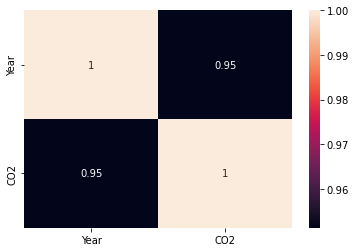

In [15]:
# heatmap 
sns.heatmap(corelation,annot=True)

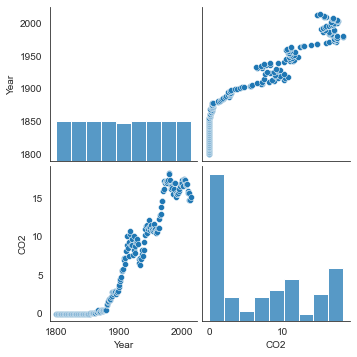

In [16]:
# Create the default pairplot
sns.set_style(style='white')
sns.pairplot(CO2_df)

<AxesSubplot:>

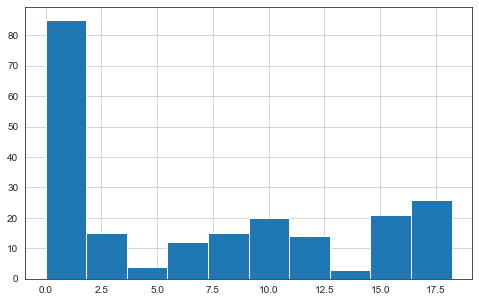

In [17]:
# histogram
CO2_df['CO2'].hist(figsize=(8,5))

### Co2 emission from 0.0 to 2 is the highest which is approximately before 1879

In [18]:
#Line Plot
import plotly.express as px
fig = px.line(CO2_df, x='Year', y="CO2",
              labels={
                     "Year": "Year",
                     "CO2": "CO2 emission value"
                 })
fig.show()

### The Co2 emission levels hit the highest in the year 1979 by the value of 18.2

<AxesSubplot:xlabel='CO2', ylabel='Density'>

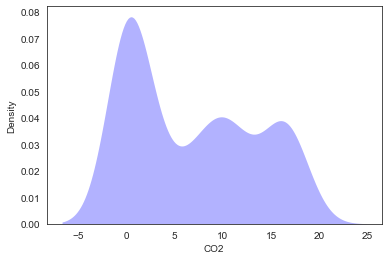

In [19]:
#Density Plot
sns.kdeplot(CO2_df["CO2"], color='BLUE', fill=True, alpha=.3, linewidth=0)

### At start it is peaked after that the curve is flat

<AxesSubplot:>

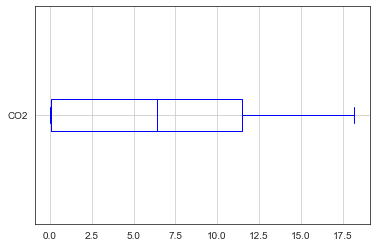

In [20]:
#Box Plot
#Boxplot
CO2_df.boxplot(column=['CO2'],vert = False, color = 'blue')

### No outliers and Data is positively or right skewed

In [21]:
CO2_df['CO2'].kurtosis()

-1.4172721357022504

### Data has negative kurtosis i.e it the peak is flat than normal distrubution

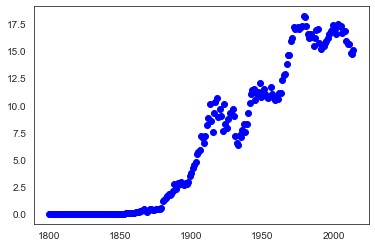

In [22]:
#Scatter plot
plt.scatter(CO2_df.Year,CO2_df.CO2,color='blue')

<AxesSubplot:ylabel='CO2'>

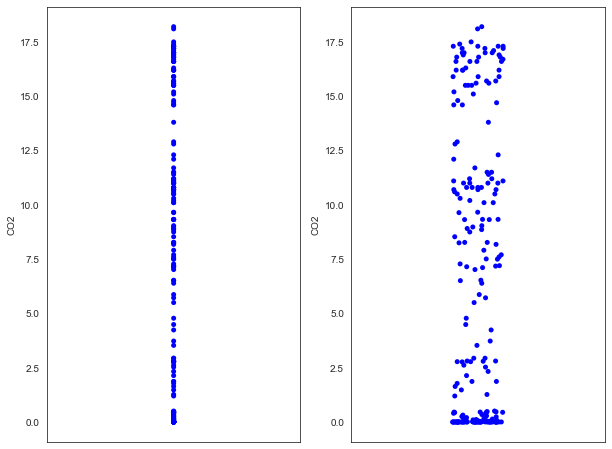

In [23]:
#Strip Plot
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.stripplot(y='CO2', data=CO2_df,jitter=False,color="blue")
plt.subplot(1, 2, 2)
sns.stripplot(y='CO2', data=CO2_df,jitter=True, color="blue")

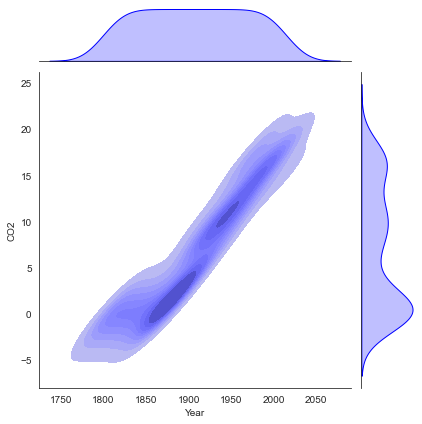

In [24]:
# joint plot
sns.jointplot(x='Year',y='CO2',data=CO2_df,kind='kde',color='BLUE',fill=True)
plt.show()

In [25]:
CO2_df=pd.read_excel('CO2 dataset.xlsx',index_col='Year',parse_dates=True)
#dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
#df = pd.read_excel("CO2 dataset.xlsx", parse_dates=['Year'], index_col='Year', date_parser=dateparse) 
CO2_df

CO2
Year                
1800-01-01   0.00568
1801-01-01   0.00561
1802-01-01   0.00555
1803-01-01   0.00548
1804-01-01   0.00542
...              ...
2010-01-01  15.60000
2011-01-01  15.60000
2012-01-01  14.80000
2013-01-01  14.70000
2014-01-01  15.10000

[215 rows x 1 columns]

### Transforming data to normal distribution

In [26]:
def diagnostic_plots(CO2_df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    CO2_df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(CO2_df[variable], dist="norm", plot=plt)

    plt.show()

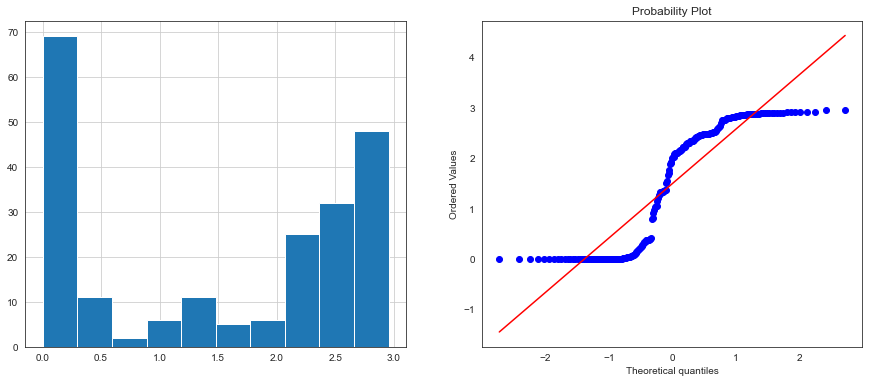

In [27]:
#Log Transformation
CO2_df['Log_co2']=np.log(CO2_df['CO2']+1)
diagnostic_plots(CO2_df,'Log_co2')

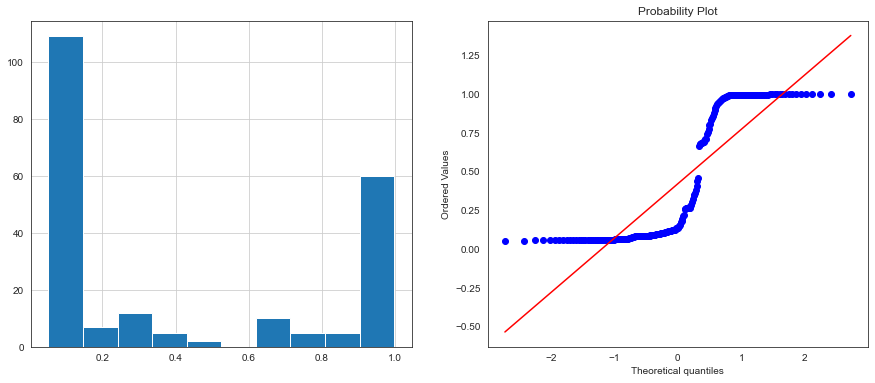

In [28]:
#Reciprocal Transformation
CO2_df['Rec_co2']=1/(CO2_df['CO2']+1)
diagnostic_plots(CO2_df,'Rec_co2')

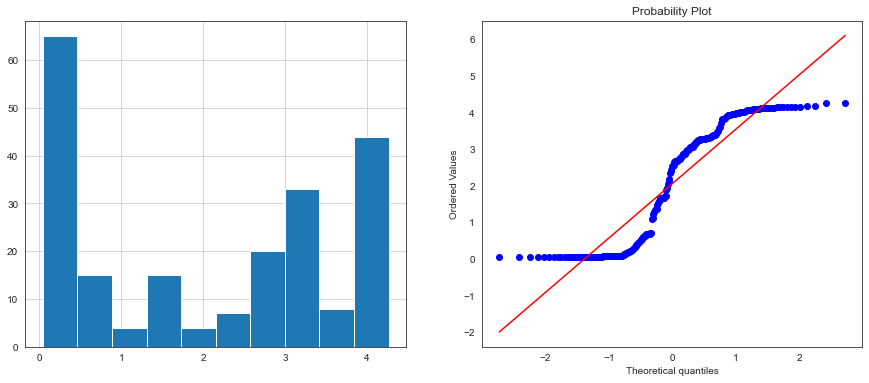

In [29]:
#Square-Root Transformation
CO2_df['sqr_co2']=CO2_df['CO2']**(1/2)
diagnostic_plots(CO2_df,'sqr_co2')

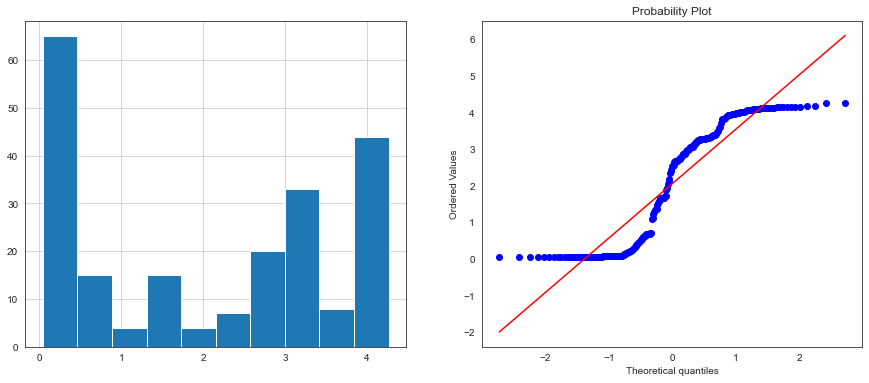

In [30]:
#Exponential Transformation
CO2_df['Exp_co2']=CO2_df['CO2']**(1/5)
diagnostic_plots(CO2_df,'sqr_co2')

Optimal lambda:  0.1626734565342775


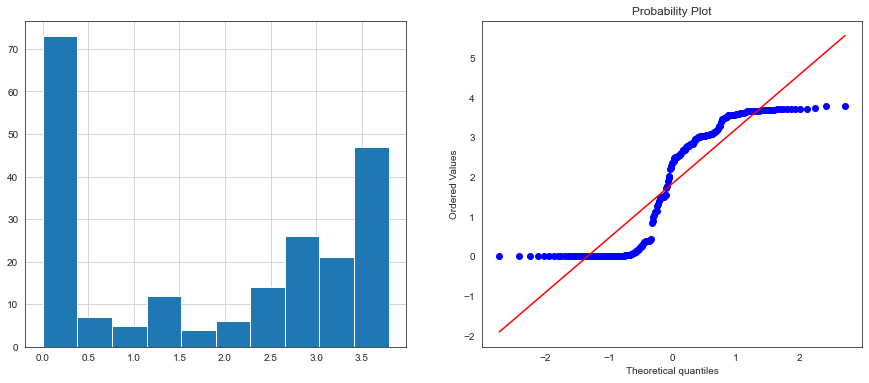

In [31]:
#Box-cox Transformation
CO2_df['co2_boxcox'], param = stats.boxcox(CO2_df.CO2+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(CO2_df, 'co2_boxcox')


In [32]:
from sklearn.preprocessing import PowerTransformer

array([[-1.41804651, -1.48126815,  1.22566669, -1.41804651, -1.41804651,
        -1.4705034 ],
       [-1.41947121, -1.48261311,  1.22571353, -1.41947121, -1.41947121,
        -1.4718637 ],
       [-1.42070347, -1.48377472,  1.22575368, -1.42070347, -1.42070347,
        -1.47303885],
       ...,
       [ 0.99832411,  0.90893134, -1.11259782,  0.99832411,  0.99832411,
         0.92603994],
       [ 0.9939589 ,  0.90676301, -1.10591376,  0.9939589 ,  0.9939589 ,
         0.92349811],
       [ 1.01128301,  0.91533591, -1.13243962,  1.011283  ,  1.01128301,
         0.93355673]])

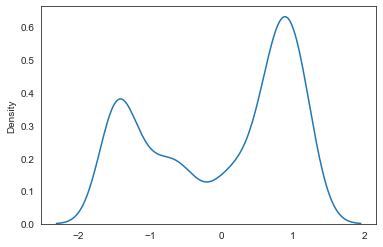

In [33]:
pt = PowerTransformer(method='box-cox')
data = pt.fit_transform(CO2_df)
sns.distplot(data, hist=False, kde=True)
data

In [34]:
from scipy.stats import boxcox 

<AxesSubplot:ylabel='Density'>

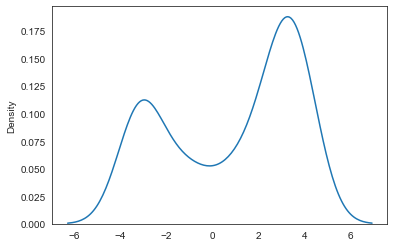

In [35]:
#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(CO2_df.CO2) 

#plot the distribution of the transformed data values
sns.distplot(transformed_data, hist=False, kde=True)

In [36]:
CO2_df.dtypes

CO2           float64
Log_co2       float64
Rec_co2       float64
sqr_co2       float64
Exp_co2       float64
co2_boxcox    float64
dtype: object

In [37]:
CO2_df.describe()

CO2     Log_co2     Rec_co2     sqr_co2     Exp_co2  co2_boxcox
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000
mean     6.741970    1.490057    0.420248    2.055194    1.159068    1.828802
std      6.522437    1.180641    0.404516    1.590570    0.563587    1.490936
min      0.001750    0.001748    0.052083    0.041833    0.280936    0.001749
25%      0.041050    0.040224    0.080000    0.202429    0.527736    0.040357
50%      6.390000    2.000128    0.135318    2.527845    1.449106    2.363875
75%     11.500000    2.525729    0.960579    3.391165    1.629820    3.123606
max     18.200000    2.954910    0.998253    4.266146    1.786546    3.793997

<AxesSubplot:xlabel='Year'>

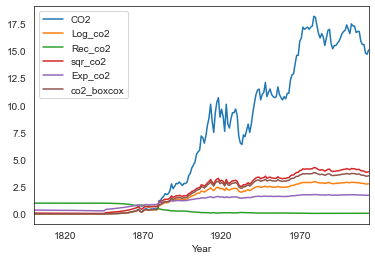

In [38]:
CO2_df.plot()

array([[<AxesSubplot:title={'center':'CO2'}>,
        <AxesSubplot:title={'center':'Log_co2'}>],
       [<AxesSubplot:title={'center':'Rec_co2'}>,
        <AxesSubplot:title={'center':'sqr_co2'}>],
       [<AxesSubplot:title={'center':'Exp_co2'}>,
        <AxesSubplot:title={'center':'co2_boxcox'}>]], dtype=object)

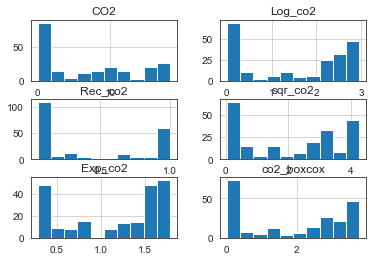

In [39]:
CO2_df.hist()

### Since we didnot get any conclusive evidence of being normal distribution. We have decided to move on without transforming it to normal distribution

In [40]:
#Dropping all transformed values from dataset
CO2_df = CO2_df.drop(['co2_boxcox', 'Log_co2','Rec_co2','sqr_co2','Exp_co2'], axis = 1)

In [41]:
CO2_df.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
test_result = adfuller(CO2_df['CO2'])

In [44]:
def TestStationaryPlot(CO2_df):
    rol_mean = CO2_df.rolling(window = 20, center = False).mean()
    rol_std = CO2_df.rolling(window = 20, center = False).std()
    
    plt.plot(CO2_df, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

In [45]:
# null Hypothesis : Data is stationary
#alternate hypothesis : Data is not stationary
def TestStationaryAdfuller(CO2_df, cutoff = 0.01):
    df_test = adfuller(CO2_df, autolag = 'AIC')
    df_test_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value (%s)'%key] = value
    print(df_test_output)
    
    if df_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

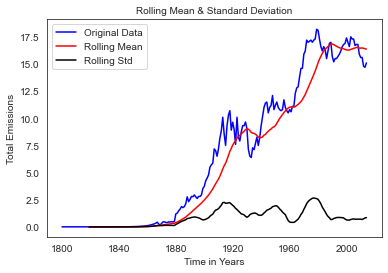

In [46]:
TestStationaryPlot(CO2_df)

In [47]:
TestStationaryAdfuller(CO2_df)

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


### So here we can see the data is non-stationary

## Transforming data to Stationary

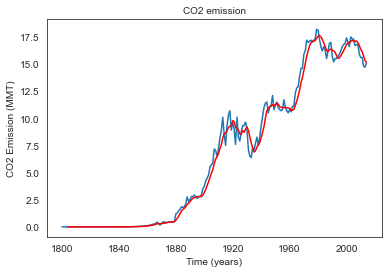

In [48]:
# Moving Average
moving_avg = CO2_df.rolling(5).mean()
plt.plot(CO2_df)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time (years)', fontsize = 10)
plt.ylabel('CO2 Emission (MMT)', fontsize = 10)
plt.title('CO2 emission', fontsize = 10)
plt.show()

In [49]:
moving_avg_diff = CO2_df - moving_avg
moving_avg_diff.head(14)

CO2
Year                
1800-01-01       NaN
1801-01-01       NaN
1802-01-01       NaN
1803-01-01       NaN
1804-01-01 -0.000128
1805-01-01 -0.000124
1806-01-01 -0.000130
1807-01-01 -0.000126
1808-01-01 -0.000124
1809-01-01 -0.000122
1810-01-01 -0.000128
1811-01-01 -0.000134
1812-01-01 -0.000138
1813-01-01 -0.000140

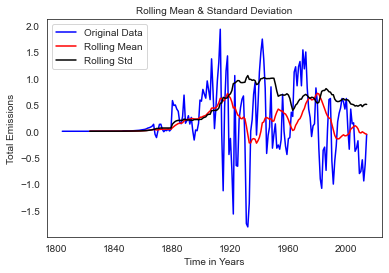

In [50]:
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [51]:
TestStationaryAdfuller(moving_avg_diff)

Test Statistic                  -3.944115
p-value                          0.001733
#Lags Used                       4.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64
Failed to reject null hypothesis. Data is stationary


### The rolling mean values appear to be varying slightly. The Test Statistic is smaller than the 10% 5%, and 1% of critical values. So, we can say with 99% confidence level that the dataset is a stationary series

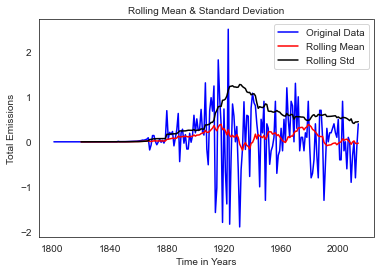

In [52]:
# Eliminating trend and sessonality: Differencing
df_first_difference = CO2_df - CO2_df.shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))

In [53]:
TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


### The first difference improves the stationarity of the series significantly. Let us use also the seasonal first order difference to remove the seasonality of the data and see how that impacts stationarity of the data

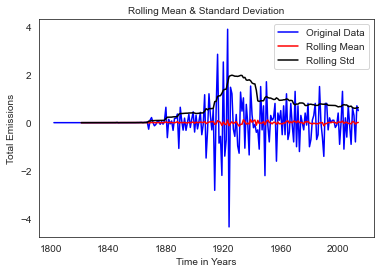

In [54]:
# Seasonal First order differencing
df_seasonal_first_difference = df_first_difference - df_first_difference.shift(1)  
TestStationaryPlot(df_seasonal_first_difference.dropna(inplace=False))

In [55]:
TestStationaryAdfuller(df_seasonal_first_difference.dropna(inplace=False))

Test Statistic                  -5.536081
p-value                          0.000002
#Lags Used                      14.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


### We are considering this seasonal first difference for further analysis because it looks more stationary

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

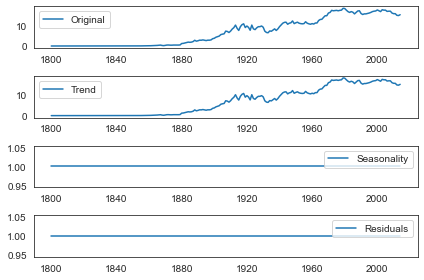

In [57]:
# Eliminating trend and seasonality: Decomposing
decomposition = seasonal_decompose(CO2_df,model="multiplicable")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(CO2_df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Here we can see that the trend, no seasonaltiy in data and we can model the trend. Here original data and trend both are equal.

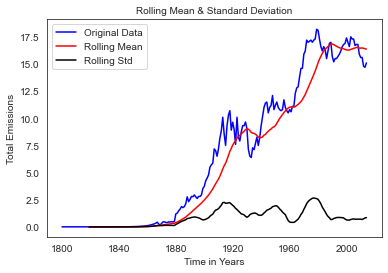

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


In [58]:
df_decompose = trend
df_decompose.dropna(inplace=True)
TestStationaryPlot(df_decompose)
TestStationaryAdfuller(df_decompose)

In [59]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

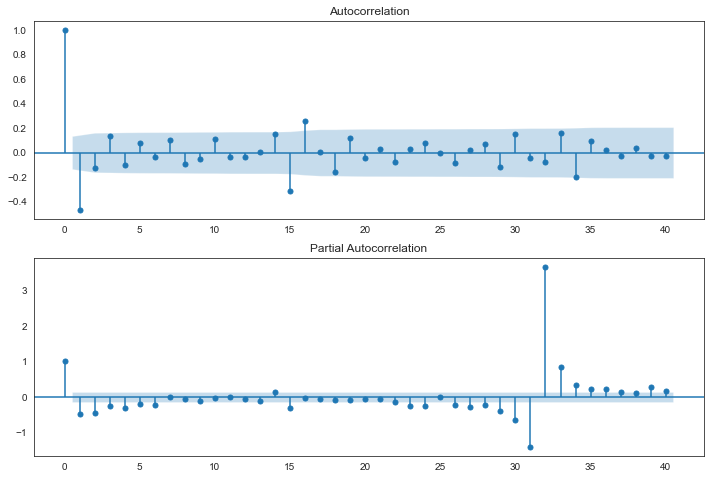

In [60]:
# ACF & PACF plot for seasonal first order difference
#ACF and PACF plots:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax2)

# Data Partitioning
#### Data Partitioning,
#### Training Data = Fit the model only to training period
#### Validating Data = Assess the model performance on validation
#### Deploy model by training on whole dataset
#### No random partition That’s because the order sequence of the time series should be intact in order to use it for forecasting

In [61]:
# using seasonal first order difference
df_seasonal_first_difference

X = df_seasonal_first_difference.dropna(inplace=False)
X

CO2
Year                    
1802-01-01  1.000000e-05
1803-01-01 -1.000000e-05
1804-01-01  1.000000e-05
1805-01-01 -8.673617e-19
1806-01-01 -1.000000e-05
...                  ...
2010-01-01  6.000000e-01
2011-01-01  3.000000e-01
2012-01-01 -8.000000e-01
2013-01-01  7.000000e-01
2014-01-01  5.000000e-01

[213 rows x 1 columns]

In [62]:
# create Training and Test
train = X.iloc[:-20]
test = X.iloc[-20:]

print(train.shape,test.shape)

(193, 1) (20, 1)


In [63]:
train

CO2
Year                    
1802-01-01  1.000000e-05
1803-01-01 -1.000000e-05
1804-01-01  1.000000e-05
1805-01-01 -8.673617e-19
1806-01-01 -1.000000e-05
...                  ...
1990-01-01 -1.400000e+00
1991-01-01  8.000000e-01
1992-01-01  8.000000e-01
1993-01-01 -3.000000e-01
1994-01-01  2.000000e-01

[193 rows x 1 columns]

In [64]:
test

CO2
Year                    
1995-01-01  1.776357e-15
1996-01-01  1.000000e-01
1997-01-01  1.000000e-01
1998-01-01 -2.000000e-01
1999-01-01 -1.000000e-01
2000-01-01  4.000000e-01
2001-01-01 -9.000000e-01
2002-01-01  0.000000e+00
2003-01-01  1.300000e+00
2004-01-01 -1.100000e+00
2005-01-01  2.000000e-01
2006-01-01 -6.000000e-01
2007-01-01  7.000000e-01
2008-01-01 -1.000000e-01
2009-01-01 -9.000000e-01
2010-01-01  6.000000e-01
2011-01-01  3.000000e-01
2012-01-01 -8.000000e-01
2013-01-01  7.000000e-01
2014-01-01  5.000000e-01

# 1) ARIMA model

In [65]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
# Hyper-parameter Tuning : Finding out optimal (p,d,q)
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [67]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [68]:
# evaluate parameters
p_values = [0, 1, 2, 3]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.613
ARIMA(0, 0, 1) RMSE=0.467
ARIMA(0, 0, 2) RMSE=0.471
ARIMA(0, 1, 0) RMSE=1.037
ARIMA(0, 1, 1) RMSE=0.613
ARIMA(0, 1, 2) RMSE=0.450
ARIMA(0, 2, 0) RMSE=1.853
ARIMA(0, 2, 1) RMSE=1.039
ARIMA(0, 2, 2) RMSE=0.679
ARIMA(1, 0, 0) RMSE=0.546
ARIMA(1, 0, 1) RMSE=0.470
ARIMA(1, 0, 2) RMSE=0.464
ARIMA(1, 1, 0) RMSE=0.838
ARIMA(1, 1, 1) RMSE=0.546
ARIMA(1, 1, 2) RMSE=0.451
ARIMA(1, 2, 0) RMSE=1.374
ARIMA(1, 2, 1) RMSE=0.840
ARIMA(1, 2, 2) RMSE=0.613
ARIMA(2, 0, 0) RMSE=0.443
ARIMA(2, 0, 1) RMSE=0.476
ARIMA(2, 0, 2) RMSE=0.462
ARIMA(2, 1, 0) RMSE=0.634
ARIMA(2, 1, 1) RMSE=0.443
ARIMA(2, 1, 2) RMSE=0.455
ARIMA(2, 2, 0) RMSE=0.999
ARIMA(2, 2, 1) RMSE=0.636
ARIMA(2, 2, 2) RMSE=0.446
ARIMA(3, 0, 0) RMSE=0.433
ARIMA(3, 0, 1) RMSE=0.465
ARIMA(3, 0, 2) RMSE=0.467
ARIMA(3, 1, 0) RMSE=0.573
ARIMA(3, 1, 1) RMSE=0.434
ARIMA(3, 1, 2) RMSE=0.444
ARIMA(3, 2, 0) RMSE=0.863
ARIMA(3, 2, 1) RMSE=0.575
ARIMA(3, 2, 2) RMSE=0.432
Best ARIMA(3, 2, 2) RMSE=0.432


In [138]:
model_arima = ARIMA(train['CO2'],order = (3,2,2))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  195
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -161.577
Date:                Thu, 18 Aug 2022   AIC                            335.154
Time:                        14:25:42   BIC                            354.730
Sample:                    01-01-1800   HQIC                           343.082
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7452      0.287     -2.598      0.009      -1.307      -0.183
ar.L2         -0.1409      0.065     -2.184      0.029      -0.267      -0.014
ar.L3         -0.0090      0.068     -0.133      0.894      -0.142       0.124
ma.L1         -0.2755      0.288     -0.955      0.339      -0.841       0.290
ma.L2         -0.7081      0.278     -2.547      0.011      -1.253      -0.163
sigma2         0.3057      0.024     12.895      0.000       0.259       0.352
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                81.56
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):            3974.77   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
### make prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1995-01-01    15.789353
1996-01-01    15.863388
1997-01-01    15.962632
1998-01-01    16.046244
1999-01-01    16.138090
2000-01-01    16.225777
2001-01-01    16.315543
2002-01-01    16.404272
2003-01-01    16.493519
2004-01-01    16.582507
2005-01-01    16.671624
2006-01-01    16.760677
2007-01-01    16.849761
2008-01-01    16.938830
2009-01-01    17.027907
2010-01-01    17.116980
2011-01-01    17.206055
2012-01-01    17.295128
2013-01-01    17.384203
2014-01-01    17.473277
Freq: AS-JAN, Name: predicted_mean, dtype: float64


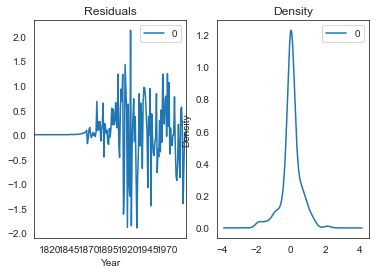

In [140]:
# Plot residual errors
residuals = pd.DataFrame(model_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [141]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [142]:
stationary_arima_acc = forecast_accuracy(pred_arima.values, test.values)
stationary_arima_acc

{'mape': 0.050625810584888103,
 'me': 0.252288234388123,
 'mae': 0.8075778453090711,
 'mpe': 0.018163192196106136,
 'rmse': 1.0143740924953564}

# 2) AUTO REGRESSOR (AR) MODEL

In [143]:
model_ar = AutoReg(train,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  195
Model:                     AutoReg(6)   Log Likelihood                -156.657
Method:               Conditional MLE   S.D. of innovations              0.554
Date:                Thu, 18 Aug 2022   AIC                             -1.095
Time:                        14:26:00   BIC                             -0.958
Sample:                    01-01-1806   HQIC                            -1.040
                         - 01-01-1994                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0825      0.057      1.455      0.146      -0.029       0.194
CO2.L1         0.9624      0.072     13.329      0.000       0.821       1.104
CO2.L2        -0.0852      0.100     -0.852      0.3

In [144]:
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

1995-01-01    15.642823
1996-01-01    15.631330
1997-01-01    15.770021
1998-01-01    15.838521
1999-01-01    15.925665
2000-01-01    15.996961
2001-01-01    16.063984
2002-01-01    16.154848
2003-01-01    16.235078
2004-01-01    16.315237
2005-01-01    16.396339
2006-01-01    16.475591
2007-01-01    16.558035
2008-01-01    16.639311
2009-01-01    16.720082
2010-01-01    16.801375
2011-01-01    16.882316
2012-01-01    16.963595
2013-01-01    17.044798
2014-01-01    17.125856
Freq: AS-JAN, dtype: float64


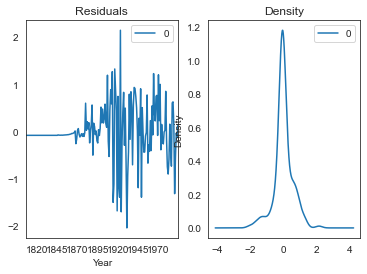

In [145]:
# Plot residual errors
residuals = pd.DataFrame(model_ar.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [146]:
stationary_ar_acc = forecast_accuracy(pred_ar.values, test.values)
stationary_ar_acc

{'mape': 0.04865443122003562,
 'me': -0.015911632031782367,
 'mae': 0.7849916603085165,
 'mpe': 0.0017401153665422319,
 'rmse': 0.957200107230533}

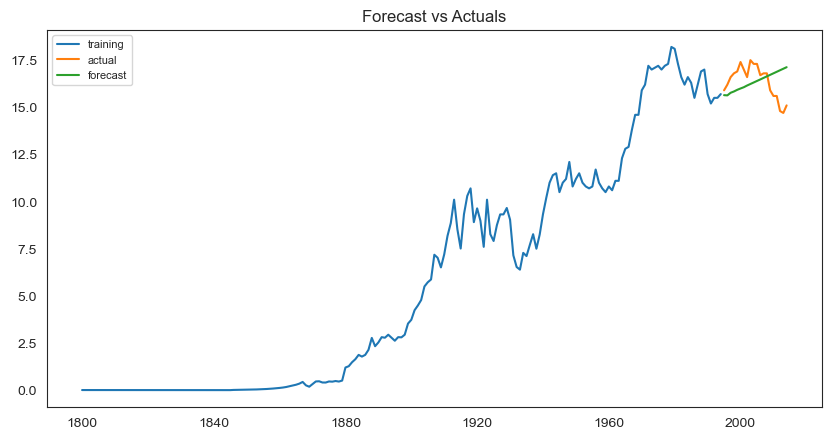

In [147]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 3) Moving Average (MA) Model

In [148]:
model_ma = ARIMA(train['CO2'],order = (0,1,3)) #order=(0,1,3)
model_ma = model_ma.fit()
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  195
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -161.848
Date:                Thu, 18 Aug 2022   AIC                            331.696
Time:                        14:26:06   BIC                            344.768
Sample:                    01-01-1800   HQIC                           336.989
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0150      0.046     -0.324      0.746      -0.106       0.076
ma.L2         -0.1201      0.050     -2.407      0.016      -0.218      -0.022
ma.L3          0.0990      0.047      2.089      0.037       0.006       0.192
sigma2         0.3105      0.023     13.680      0.000       0.266       0.355
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                85.65
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):            3628.50   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
pred_ma = model_ma.predict(start=start,end=end)
print(pred_ma)

1995-01-01    15.699705
1996-01-01    15.673508
1997-01-01    15.700150
1998-01-01    15.700150
1999-01-01    15.700150
2000-01-01    15.700150
2001-01-01    15.700150
2002-01-01    15.700150
2003-01-01    15.700150
2004-01-01    15.700150
2005-01-01    15.700150
2006-01-01    15.700150
2007-01-01    15.700150
2008-01-01    15.700150
2009-01-01    15.700150
2010-01-01    15.700150
2011-01-01    15.700150
2012-01-01    15.700150
2013-01-01    15.700150
2014-01-01    15.700150
Freq: AS-JAN, Name: predicted_mean, dtype: float64


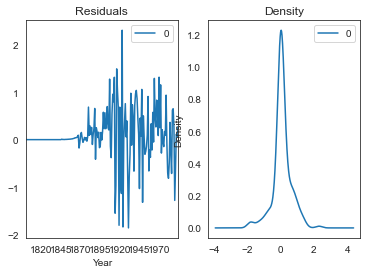

In [150]:
# Plot residual errors
residuals = pd.DataFrame(model_ma.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [151]:
stationary_ma_acc = forecast_accuracy(pred_ma.values, test.values)
stationary_ma_acc

{'mape': 0.05679217387532194,
 'me': -0.6762042584082393,
 'mae': 0.9456021292041197,
 'mpe': -0.038692554036794426,
 'rmse': 1.0766433324789169}

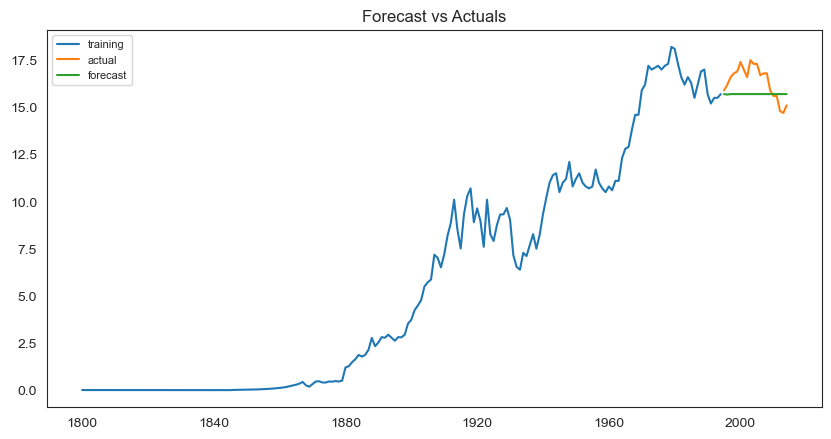

In [152]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ma, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Comparing RMSE values of Models

In [153]:
data = {"MODEL":pd.Series(["ARIMA","Auto Regressor","Moving Average"]),"RMSE_Values":pd.Series([stationary_arima_acc["rmse"],stationary_ar_acc["rmse"],
stationary_ma_acc["rmse"],]),"MAPE_values":pd.Series([stationary_arima_acc["mape"],stationary_ar_acc["mape"],stationary_ma_acc["mape"]]),
"ME_values":pd.Series([stationary_arima_acc["me"],stationary_ar_acc["me"],stationary_ma_acc["me"]]),
"MAE_values":pd.Series([stationary_arima_acc["mae"],stationary_ar_acc["mae"],stationary_ma_acc["mae"]]),
        "MPE_values":pd.Series([stationary_arima_acc["mpe"],stationary_ar_acc["mpe"],stationary_ma_acc["mpe"]])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

MODEL  RMSE_Values  MAPE_values  ME_values  MAE_values  MPE_values
1  Auto Regressor     0.957200     0.048654  -0.015912    0.784992    0.001740
0           ARIMA     1.014374     0.050626   0.252288    0.807578    0.018163
2  Moving Average     1.076643     0.056792  -0.676204    0.945602   -0.038693

# B) MODEL BUILDING ON NON-STATIONARY DATA/ ORIGINAL DATA

In [85]:
# data partitioning 
CO2_df.head()

CO2
Year               
1800-01-01  0.00568
1801-01-01  0.00561
1802-01-01  0.00555
1803-01-01  0.00548
1804-01-01  0.00542

In [86]:
train = CO2_df[:195]
test = CO2_df[195:]
print(train.shape,test.shape)

(195, 1) (20, 1)


In [87]:
train

CO2
Year                
1800-01-01   0.00568
1801-01-01   0.00561
1802-01-01   0.00555
1803-01-01   0.00548
1804-01-01   0.00542
...              ...
1990-01-01  15.70000
1991-01-01  15.20000
1992-01-01  15.50000
1993-01-01  15.50000
1994-01-01  15.70000

[195 rows x 1 columns]

In [88]:
test

CO2
Year            
1995-01-01  15.9
1996-01-01  16.2
1997-01-01  16.6
1998-01-01  16.8
1999-01-01  16.9
2000-01-01  17.4
2001-01-01  17.0
2002-01-01  16.6
2003-01-01  17.5
2004-01-01  17.3
2005-01-01  17.3
2006-01-01  16.7
2007-01-01  16.8
2008-01-01  16.8
2009-01-01  15.9
2010-01-01  15.6
2011-01-01  15.6
2012-01-01  14.8
2013-01-01  14.7
2014-01-01  15.1

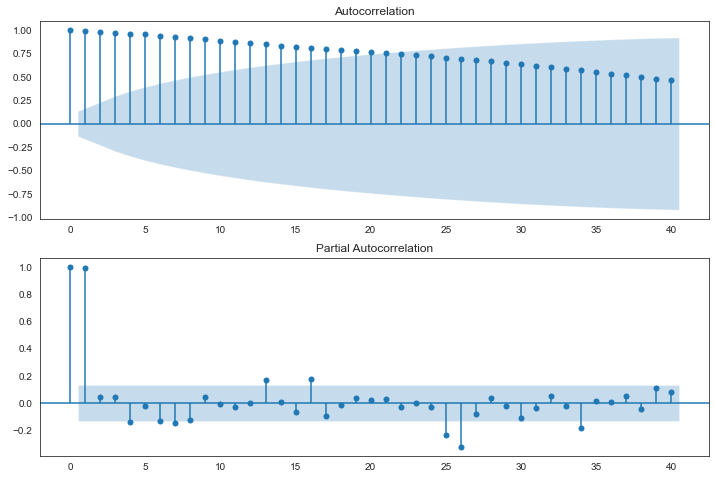

In [89]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(CO2_df, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(CO2_df, lags=40, ax=ax2)

# 1. Arima

In [90]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [91]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [92]:
# evaluate parameters
p_values = [0,1,2,3,4,5]
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, test.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=10.175
ARIMA(0, 0, 1) RMSE=5.218
ARIMA(0, 0, 2) RMSE=3.120
ARIMA(0, 0, 3) RMSE=1.965
ARIMA(0, 0, 4) RMSE=1.884
ARIMA(0, 1, 0) RMSE=0.438
ARIMA(0, 1, 1) RMSE=0.439
ARIMA(0, 1, 2) RMSE=0.439
ARIMA(0, 1, 3) RMSE=0.424
ARIMA(0, 1, 4) RMSE=0.424
ARIMA(0, 2, 0) RMSE=0.612
ARIMA(0, 2, 1) RMSE=0.451
ARIMA(0, 2, 2) RMSE=0.454
ARIMA(0, 2, 3) RMSE=0.458
ARIMA(0, 2, 4) RMSE=0.443
ARIMA(0, 3, 0) RMSE=1.037
ARIMA(0, 3, 1) RMSE=0.613
ARIMA(0, 3, 2) RMSE=0.450
ARIMA(0, 3, 3) RMSE=0.452
ARIMA(0, 3, 4) RMSE=0.458
ARIMA(0, 4, 0) RMSE=1.853
ARIMA(0, 4, 1) RMSE=1.039
ARIMA(0, 4, 2) RMSE=0.679
ARIMA(0, 4, 3) RMSE=0.446
ARIMA(0, 4, 4) RMSE=0.445
ARIMA(1, 0, 0) RMSE=0.437
ARIMA(1, 0, 1) RMSE=0.438
ARIMA(1, 0, 2) RMSE=0.438
ARIMA(1, 0, 3) RMSE=0.423
ARIMA(1, 0, 4) RMSE=0.423
ARIMA(1, 1, 0) RMSE=0.439
ARIMA(1, 1, 1) RMSE=0.433
ARIMA(1, 1, 2) RMSE=0.431
ARIMA(1, 1, 3) RMSE=0.437
ARIMA(1, 1, 4) RMSE=0.440
ARIMA(1, 2, 0) RMSE=0.544
ARIMA(1, 2, 1) RMSE=0.453
ARIMA(1, 2, 2) RMSE=0.446
ARIMA(1, 2,

In [154]:
#ARIMA 3,1,4
model_arima = ARIMA(train['CO2'],order = (3,1,4))
model_arima = model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  195
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -156.502
Date:                Thu, 18 Aug 2022   AIC                            329.004
Time:                        14:27:09   BIC                            355.147
Sample:                    01-01-1800   HQIC                           339.590
                         - 01-01-1994                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4631      0.216      6.783      0.000       1.040       1.886
ar.L2         -0.0812      0.411     -0.197      0.843      -0.887       0.725
ar.L3         -0.4564      0.214     -2.132      0.033      -0.876      -0.037
ma.L1         -1.5367      0.225     -6.821      0.000      -1.978      -1.095
ma.L2          0.0407      0.409      0.099      0.921      -0.761       0.843
ma.L3          0.7833      0.208      3.763      0.000       0.375       1.191
ma.L4         -0.2129      0.057     -3.715      0.000      -0.325      -0.101
sigma2         0.2909      0.024     12.020      0.000       0.243       0.338
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                74.35
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):            3464.10   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [155]:
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1995-01-01    15.888615
1996-01-01    16.091795
1997-01-01    16.341603
1998-01-01    16.592490
1999-01-01    16.846545
2000-01-01    17.083869
2001-01-01    17.295960
2002-01-01    17.471049
2003-01-01    17.601684
2004-01-01    17.681798
2005-01-01    17.708494
2006-01-01    17.681426
2007-01-01    17.603089
2008-01-01    17.478488
2009-01-01    17.314899
2010-01-01    17.121424
2011-01-01    16.908501
2012-01-01    16.687347
2013-01-01    16.469369
2014-01-01    16.265582
Freq: AS-JAN, Name: predicted_mean, dtype: float64


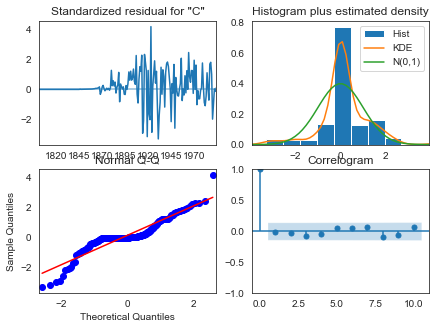

In [156]:
model_arima.plot_diagnostics(figsize=(7,5))
plt.show()

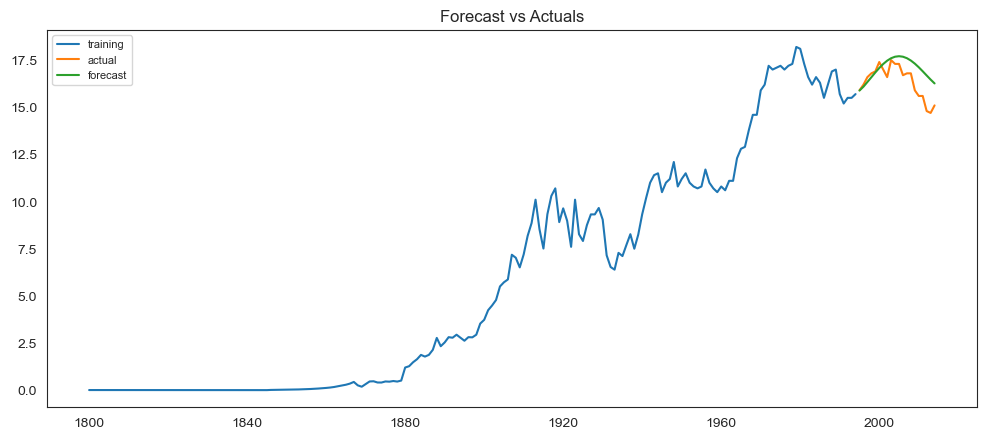

In [157]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_arima, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [158]:
ns_arima_acc = forecast_accuracy(pred_arima,test.CO2)
ns_arima_acc

{'mape': 0.046022421769464895,
 'me': 0.6317012982603466,
 'mae': 0.7272095582786728,
 'mpe': 0.040357954880841276,
 'rmse': 0.9365474293921737}

# 2) Auto Regressor

In [159]:
model_ar = AutoReg(train,lags = 1).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  195
Model:                     AutoReg(1)   Log Likelihood                -161.622
Method:               Conditional MLE   S.D. of innovations              0.557
Date:                Thu, 18 Aug 2022   AIC                             -1.141
Time:                        14:27:15   BIC                             -1.090
Sample:                    01-01-1801   HQIC                            -1.120
                         - 01-01-1994                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0784      0.055      1.420      0.156      -0.030       0.187
CO2.L1         1.0004      0.007    149.772      0.000       0.987       1.014
                                    Roots           

In [160]:
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

1995-01-01    15.785295
1996-01-01    15.870628
1997-01-01    15.955998
1998-01-01    16.041406
1999-01-01    16.126852
2000-01-01    16.212335
2001-01-01    16.297856
2002-01-01    16.383414
2003-01-01    16.469010
2004-01-01    16.554643
2005-01-01    16.640314
2006-01-01    16.726023
2007-01-01    16.811770
2008-01-01    16.897554
2009-01-01    16.983376
2010-01-01    17.069236
2011-01-01    17.155133
2012-01-01    17.241069
2013-01-01    17.327042
2014-01-01    17.413052
Freq: AS-JAN, dtype: float64


In [161]:
ns_ar_acc = forecast_accuracy(pred_ar.values, test.values)
ns_ar_acc

{'mape': 0.0498721151411498,
 'me': 0.2231003167408257,
 'mae': 0.7960986374051159,
 'mpe': 0.016375885511672343,
 'rmse': 0.9978427121395731}

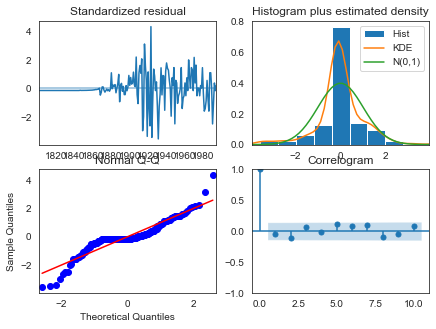

In [162]:
model_ar.plot_diagnostics(figsize=(7,5))
plt.show()

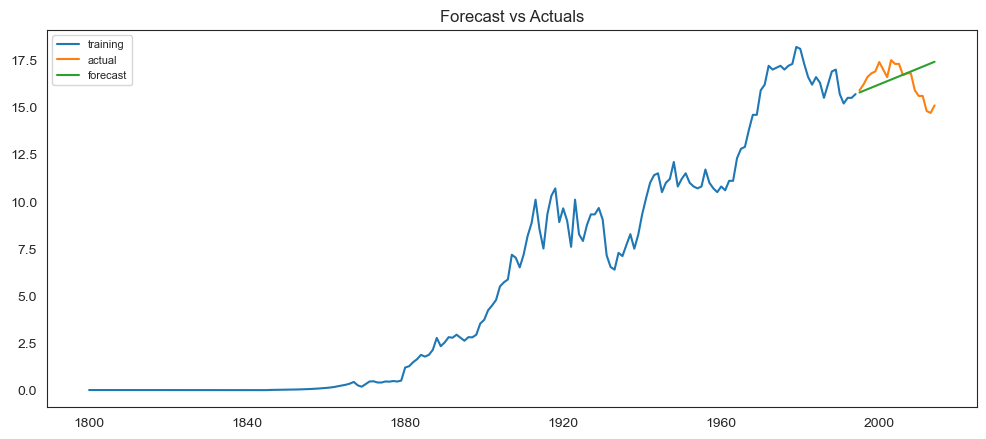

In [163]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 3) Single Exponential Smoothing

In [164]:
fit1 = SimpleExpSmoothing(train).fit(smoothing_level = 0.2,optimized = False)
fit2 =SimpleExpSmoothing(train).fit(smoothing_level = 0.8,optimized = False)

Text(0.5, 1.0, 'Fitted values Vs Original Values')

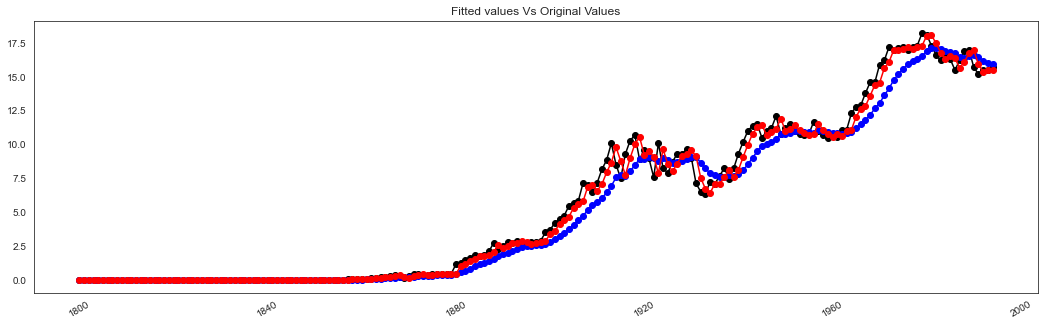

In [165]:
plt.figure(figsize=(18,5))
plt.plot(train,marker = 'o',color = 'black')
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues,marker = 'o',color = 'blue')
plt.plot(fit2.fittedvalues,marker = 'o',color = 'red')
plt.title('Fitted values Vs Original Values')

In [166]:
pred_ses = fit1.predict(start = len(train),end = len(train)+len(test)-1)

In [167]:
ns_ses_acc = forecast_accuracy(pred_ses,test.CO2)
ns_ses_acc

{'mape': 0.05140341313825274,
 'me': -0.48532979923801467,
 'mae': 0.8501648996190075,
 'mpe': -0.027004457582465242,
 'rmse': 0.9682045310926879}

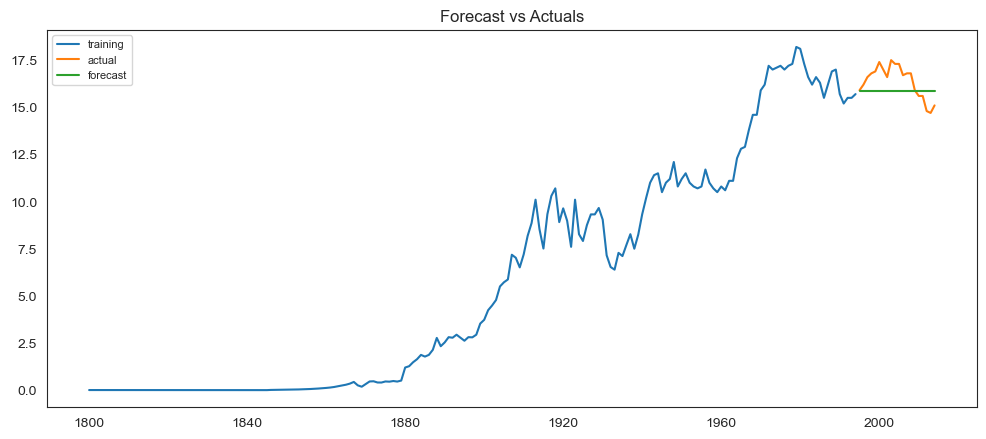

In [168]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 4) Double Exponential Smoothing or Holt's method

In [169]:
fit3 = Holt(train,exponential=True,damped_trend=False).fit()

Text(0.5, 1.0, 'Fitted values Vs Original Values')

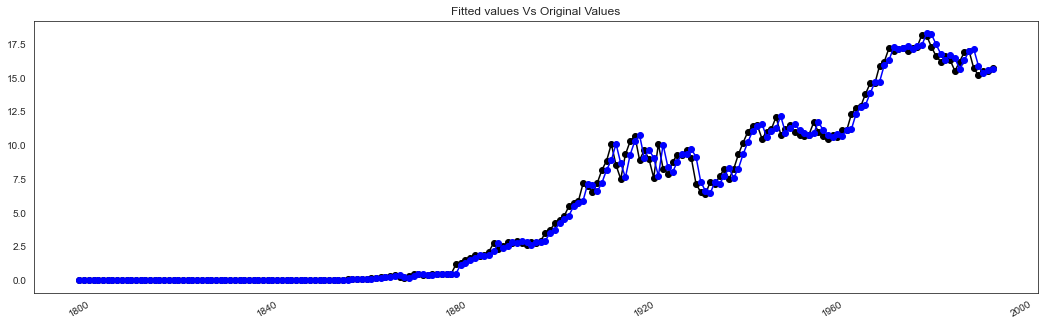

In [170]:
plt.figure(figsize=(18,5))
plt.plot(train,marker = 'o',color = 'black')
plt.xticks(rotation=30)
plt.plot(fit3.fittedvalues,marker = 'o',color = 'blue')
plt.title('Fitted values Vs Original Values')

In [171]:
pred_holt = fit3.predict(start = len(train),end = len(train)+len(test)-1)

In [172]:
ns_des_acc = forecast_accuracy(pred_holt,test.CO2)
ns_des_acc

{'mape': 0.06935421051873251,
 'me': 0.5653183140193118,
 'mae': 1.0870927802991524,
 'mpe': 0.03873749850698638,
 'rmse': 1.4907783655003135}

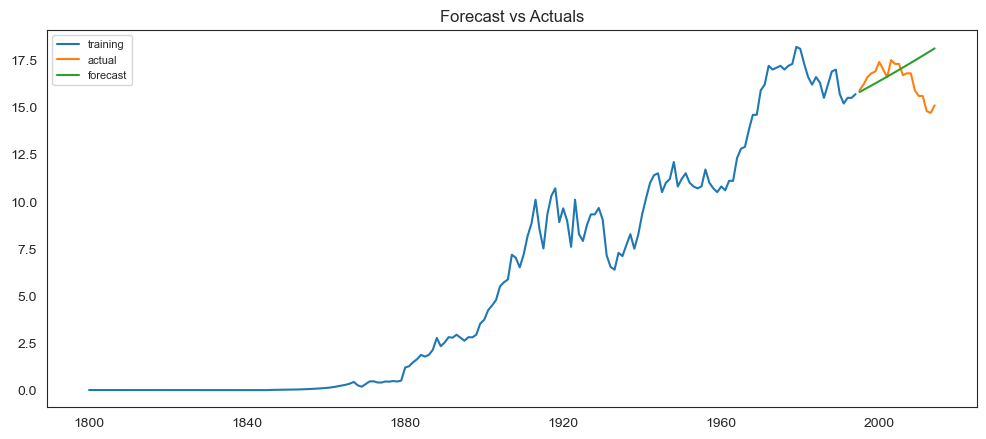

In [173]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_holt, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 5) Triple Exponential Smoothing or Holt - Winter's Method

In [174]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=2,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = start,end = end)

In [175]:
ns_tes_add_add_acc = forecast_accuracy(pred_hwe_add_add,test.CO2)
ns_tes_add_add_acc

{'mape': 0.05702157595859677,
 'me': -0.31150509938954657,
 'mae': 0.929878364314245,
 'mpe': -0.01595642010968908,
 'rmse': 1.022882852333289}

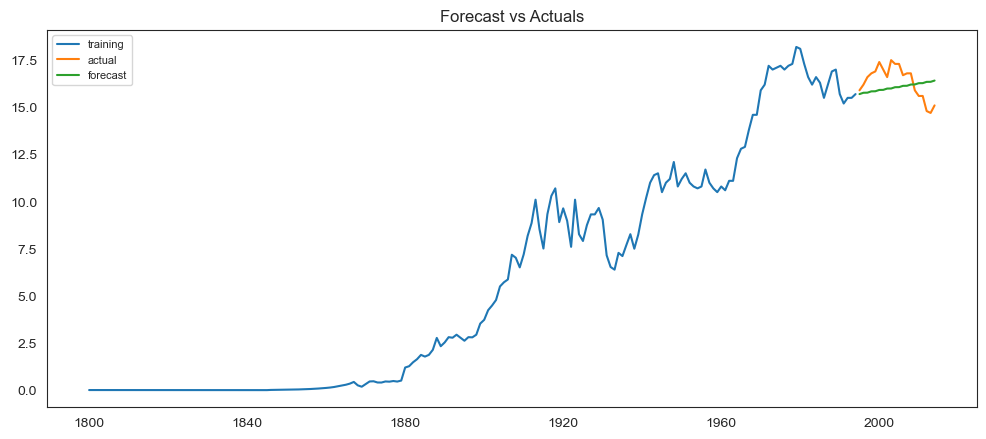

In [176]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 6) Triple Exponential Smoothing with multiplicative seasonality and additive trend

In [177]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["CO2"],seasonal="mul",trend="add",seasonal_periods=2).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = start,end = end)

In [178]:
ns_tes_mul_add_acc = forecast_accuracy(pred_hwe_mul_add,test.CO2)
ns_tes_mul_add_acc

{'mape': 0.05910214451673618,
 'me': 0.10828527416321218,
 'mae': 0.9406975833135484,
 'mpe': 0.010238208510206067,
 'rmse': 1.1713221544650183}

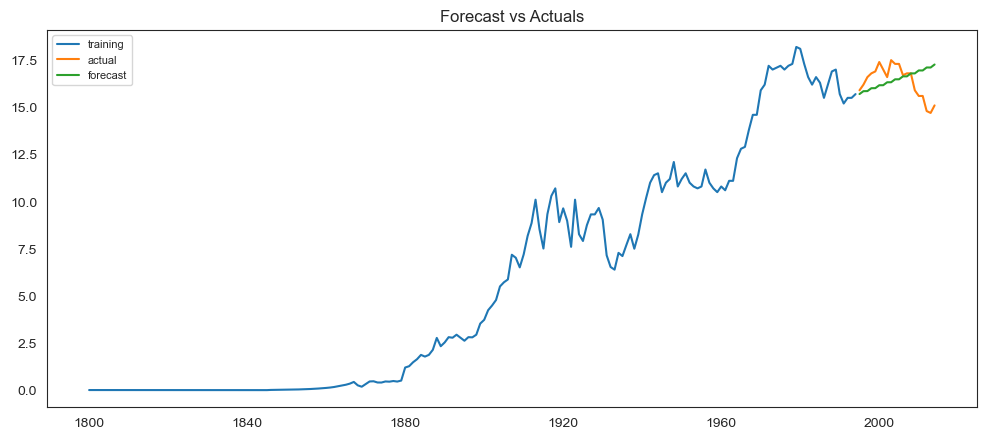

In [179]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# 7) Triple Exponential Smoothing with multiplicative seasonality and multiplicative trend

In [180]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_mul = ExponentialSmoothing(train["CO2"],seasonal="mul",trend="mul",seasonal_periods=2).fit()
pred_hwe_mul_mul = hwe_model_mul_add.predict(start = start,end = end)

In [181]:
ns_tes_mul_mul_acc = forecast_accuracy(pred_hwe_mul_mul,test.CO2)
ns_tes_mul_mul_acc

{'mape': 0.05910214451673618,
 'me': 0.10828527416321218,
 'mae': 0.9406975833135484,
 'mpe': 0.010238208510206067,
 'rmse': 1.1713221544650183}

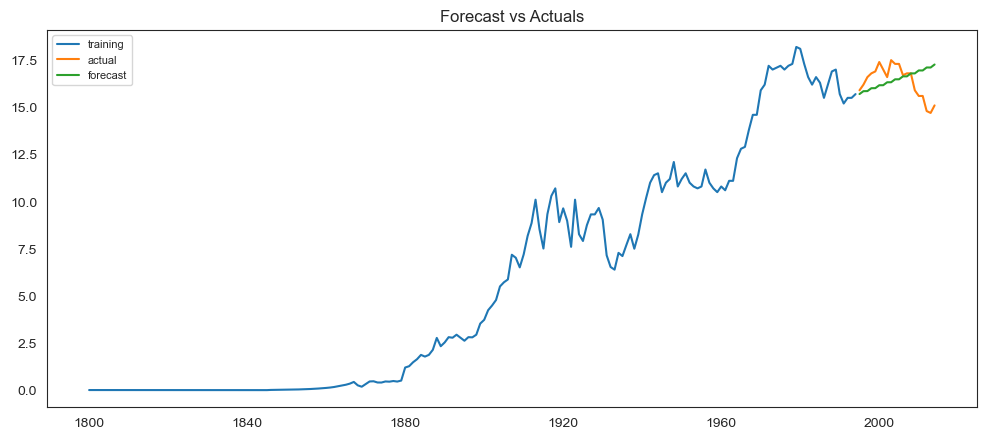

In [182]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Comparing Models

In [185]:
data = {"MODEL":pd.Series(["ARIMA(3,1,4)","Auto Regressor","single exponential smoothing","Double exponential smoothing","Triple exponential smoothing(additive seasonality & additive trend)","Triple exponential smoothing(multiplicative seasonality & additive trend)","Triple exponential smoothing(multiplicative seasonality & multiplicative trend)"]),
"RMSE_values":pd.Series([ns_arima_acc["rmse"],ns_ar_acc["rmse"],ns_ses_acc["rmse"],ns_des_acc["rmse"],ns_tes_add_add_acc["rmse"],ns_tes_mul_add_acc["rmse"],ns_tes_mul_mul_acc["rmse"]]),
"MAPE_values":pd.Series([ns_arima_acc["mape"],ns_ar_acc["mape"],ns_ses_acc["mape"],ns_des_acc["mape"],ns_tes_add_add_acc["mape"],ns_tes_mul_add_acc["mape"],ns_tes_mul_mul_acc["mape"]]),
"ME_values":pd.Series([ns_arima_acc["me"],ns_ar_acc["me"],ns_ses_acc["me"],ns_des_acc["me"],ns_tes_add_add_acc["me"],ns_tes_mul_add_acc["me"],ns_tes_mul_mul_acc["me"]]),
"MAE_values":pd.Series([ns_arima_acc["mae"],ns_ar_acc["mae"],ns_ses_acc["mae"],ns_des_acc["mae"],ns_tes_add_add_acc["mae"],ns_tes_mul_add_acc["mae"],ns_tes_mul_mul_acc["mae"]]),
"MPE_values":pd.Series([ns_arima_acc["mpe"],ns_ar_acc["mpe"],ns_ses_acc["mpe"],ns_des_acc["mpe"],ns_tes_add_add_acc["mpe"],ns_tes_mul_add_acc["mpe"],ns_tes_mul_mul_acc["mpe"]])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['MAPE_values'])

MODEL  RMSE_values  \
0                                       ARIMA(3,1,4)     0.936547   
1                                     Auto Regressor     0.997843   
2                       single exponential smoothing     0.968205   
4  Triple exponential smoothing(additive seasonal...     1.022883   
5  Triple exponential smoothing(multiplicative se...     1.171322   
6  Triple exponential smoothing(multiplicative se...     1.171322   
3                       Double exponential smoothing     1.490778   

   MAPE_values  ME_values  MAE_values  MPE_values  
0     0.046022   0.631701    0.727210    0.040358  
1     0.049872   0.223100    0.796099    0.016376  
2     0.051403  -0.485330    0.850165   -0.027004  
4     0.057022  -0.311505    0.929878   -0.015956  
5     0.059102   0.108285    0.940698    0.010238  
6     0.059102   0.108285    0.940698    0.010238  
3     0.069354   0.565318    1.087093    0.038737

# Final Model

In [186]:
# We have selected Arima(3,1,4) with orignal data as our final model beacause of following reasons:

# 1. least MAPE & MAE value
# 2. Forecasted values vs Actual values graphs capturing more information when compared to other models

In [188]:
final_arima = ARIMA(CO2_df['CO2'],order = (3,1,4))
final_arima = final_arima.fit()
final_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -166.982
Date:                Thu, 18 Aug 2022   AIC                            349.965
Time:                        14:34:43   BIC                            376.892
Sample:                    01-01-1800   HQIC                           360.846
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4795      0.190      7.806      0.000       1.108       1.851
ar.L2         -0.1098      0.363     -0.302      0.762      -0.822       0.602
ar.L3         -0.4446      0.189     -2.358      0.018      -0.814      -0.075
ma.L1         -1.5634      0.197     -7.955      0.000      -1.949      -1.178
ma.L2          0.0750      0.361      0.207      0.836      -0.633       0.783
ma.L3          0.7937      0.187      4.242      0.000       0.427       1.160
ma.L4         -0.2329      0.052     -4.501      0.000      -0.334      -0.132
sigma2         0.2761      0.021     13.193      0.000       0.235       0.317
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                77.88
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):             231.60   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [232]:
final_arima.fittedvalues.tail()

Year
2010-01-01    15.750264
2011-01-01    15.436553
2012-01-01    15.304165
2013-01-01    14.562505
2014-01-01    14.551933
dtype: float64

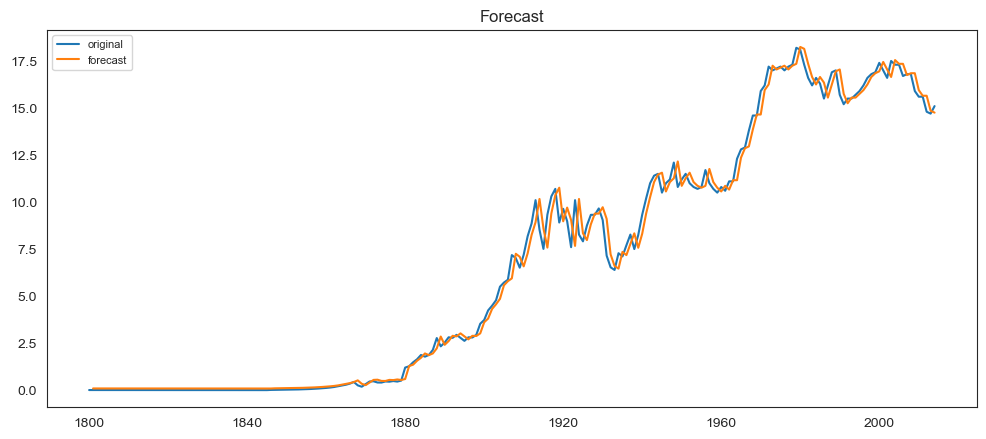

In [233]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(CO2_df, label='original')
#plt.plot(test, label='actual')
plt.plot(final_ar.fittedvalues, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Creating dataframe for future forecasting of 20 years

In [219]:
future_dates=[CO2_df.index[-1]+ DateOffset(years=x)for x in range(0,21)]

In [220]:
future_df=pd.DataFrame(index=future_dates[1:],columns=CO2_df.columns)

In [221]:
future_df

CO2
2015-01-01  NaN
2016-01-01  NaN
2017-01-01  NaN
2018-01-01  NaN
2019-01-01  NaN
2020-01-01  NaN
2021-01-01  NaN
2022-01-01  NaN
2023-01-01  NaN
2024-01-01  NaN
2025-01-01  NaN
2026-01-01  NaN
2027-01-01  NaN
2028-01-01  NaN
2029-01-01  NaN
2030-01-01  NaN
2031-01-01  NaN
2032-01-01  NaN
2033-01-01  NaN
2034-01-01  NaN

In [222]:
len(future_df)

20

# Forecasting for next 20 years using Final Arima model

In [227]:
future_df['CO2'] = final_arima.predict(start = 215, end = 235, dynamic= True)  

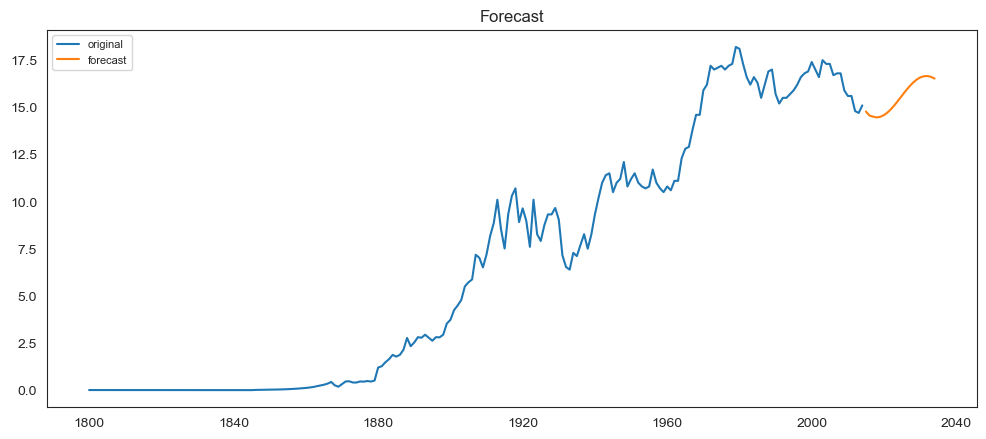

In [228]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(CO2_df, label='original')
#plt.plot(test, label='actual')
plt.plot(future_df['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [230]:
future_df.tail()

CO2
2030-01-01  16.579093
2031-01-01  16.644832
2032-01-01  16.656911
2033-01-01  16.615605
2034-01-01  16.523939

### Exporting to csv file

In [231]:
# Exporting to csv file
future_df.to_csv('forecast_data_20years.csv',index=True)

### Saving the pickle file

In [234]:
import pickle as pkl
from pickle import dump
from pickle import load
pkl.dump(final_arima, open('Co2_Forecasting.pkl','wb'))

### save the model to disk

In [201]:
filename = 'final_model.sav'
dump(final_arima, open('filename', 'wb'))